## Importing Libraries :

#### Basic Python Libraries: 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#### Preprocessing  Libraries: 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

#### Deep Learning Libraries: 

In [3]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

## Loading Breast Images :

In [4]:
cancer = []
normal = []

for img in glob.iglob("./Desktop/Cancer/Yes/*.jpg"): 
    cancer.append(img)
for img in glob.iglob("./Desktop/Cancer/No/*.jpg"): 
    normal.append(img)
    
print("There are ",len(cancer), "images of cancer  data")
print("There are ",len(normal), "images of normal data")

There are  154 images of cancer  data
There are  83 images of normal data


## Data Partition :

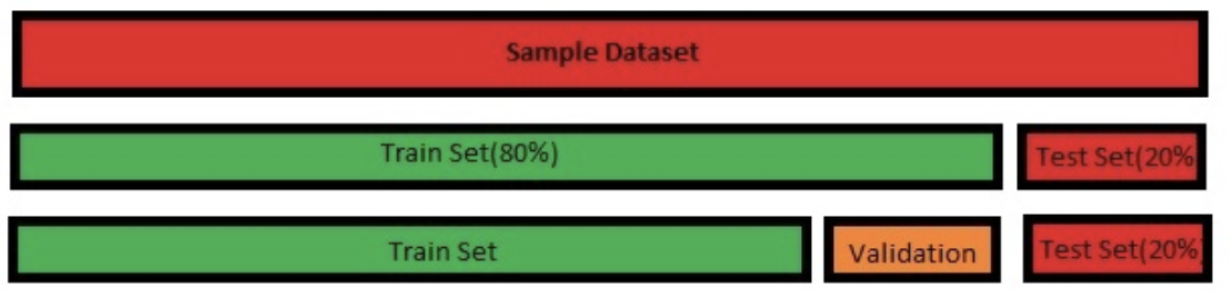

In [5]:
np.random.shuffle(cancer)
np.random.shuffle(normal)
train_cancer, val_cancer, test_cancer = np.split(cancer, [int(len(cancer)*0.7), int(len(cancer)*0.8)])
train_normal, val_normal, test_normal = np.split(normal, [int(len(normal)*0.7), int(len(normal)*0.8)])

In [6]:
# train, validation and test dataframe for cancer images
train_cancer_df = pd.DataFrame({'image':train_cancer, 'label':'cancer'})
val_cancer_df = pd.DataFrame({'image':val_cancer, 'label':'cancer'})
test_cancer_df = pd.DataFrame({'image':test_cancer, 'label':'cancer'})

# train, validation and test dataframe for normal images
train_normal_df = pd.DataFrame({'image':train_normal, 'label':'normal'})
val_normal_df = pd.DataFrame({'image':val_normal, 'label':'normal'})
test_normal_df = pd.DataFrame({'image':test_normal, 'label':'normal'})

In [7]:
# Final train, validation and test dafatframe
train_df = pd.concat([train_cancer_df, train_normal_df])
val_df = pd.concat([val_cancer_df, val_normal_df])
test_df = pd.concat([test_cancer_df, test_normal_df])
print("There are", len(train_df), "images in the training set")
print("There are", len(val_df), "images in the validation set")
print("There are", len(test_df), "images in the test set")

There are 165 images in the training set
There are 24 images in the validation set
There are 48 images in the test set


## Data Preprocessing :

In [8]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

#create the ImageDataGenerator object and rescale the images
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

#convert them into a dataset
train_dataset = trainGenerator.flow_from_dataframe(
    dataframe=train_df,
    class_mode="binary",
    x_col="image",
    y_col="label",
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH))

val_dataset = valGenerator.flow_from_dataframe(
    dataframe=val_df,
    class_mode='binary',
    x_col="image",
    y_col="label",
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH))

test_dataset = testGenerator.flow_from_dataframe(
    dataframe=test_df,
    class_mode='binary',
    x_col="image",
    y_col="label",
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH)
)

Found 165 validated image filenames belonging to 2 classes.
Found 24 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.


In [9]:
test_dataset_0 = testGenerator.flow_from_dataframe(
    dataframe=test_df,
    class_mode='binary',
    x_col="image",
    y_col="label",
    batch_size=48,
    seed=42,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH))

train_dataset_0 = trainGenerator.flow_from_dataframe(
    dataframe=train_df,
    class_mode="binary",
    x_col="image",
    y_col="label",
    batch_size=48,
    seed=42,
    shuffle=True,
    target_size=(IMG_HEIGHT,IMG_WIDTH))

def plot_images(num): 
    imgs_0, labels_0 = next(iter(train_dataset_0))
    imgs_1, labels_1 = next(iter(test_dataset_0))
    plt.figure(figsize=(16,9))
    for i in range(num): 
        plt.subplot(1, num, i+1)
        plt.imshow(imgs_0[i])
    plt.figure(figsize=(16,9))
    for i in range(num): 
        plt.subplot(1, num, i+1)
        plt.imshow(imgs_1[i])

Found 48 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


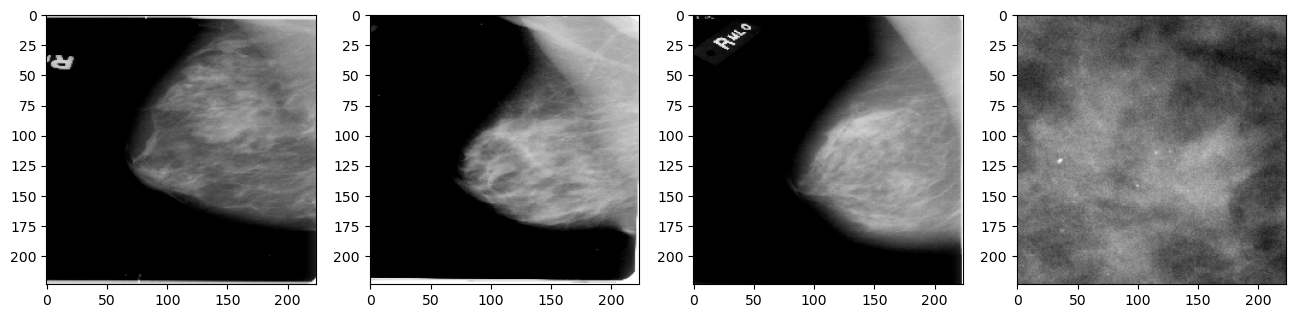

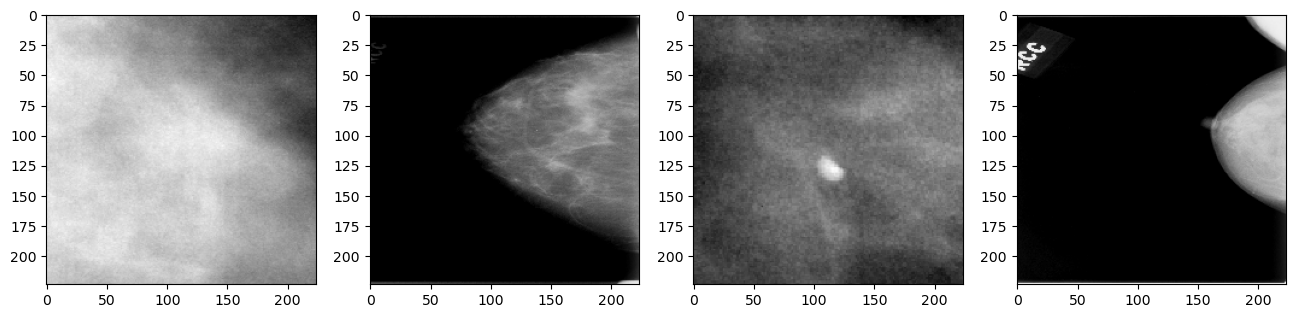

In [10]:
plot_images(4)

## CNN Modelization :

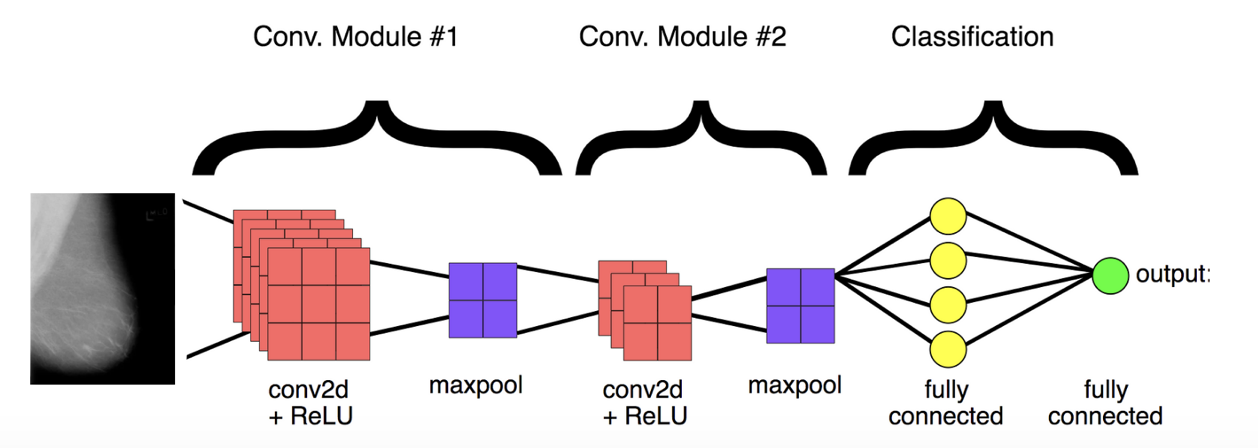

In [11]:
model = tf.keras.Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
algo = model.fit(train_dataset, epochs=30, validation_data=(val_dataset))

Epoch 1/30


/Users/adnanederoui/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5580 - loss: 0.6475 - val_accuracy: 0.6667 - val_loss: 0.4742
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6861 - loss: 0.5046 - val_accuracy: 0.6667 - val_loss: 0.4359
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6173 - loss: 0.5291 - val_accuracy: 0.6667 - val_loss: 0.4052
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6801 - loss: 0.4608 - val_accuracy: 0.7917 - val_loss: 0.3541
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 969ms/step - accuracy: 0.7326 - loss: 0.4265 - val_accuracy: 0.8750 - val_loss: 0.2827
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8852 - loss: 0.3578 - val_accuracy: 1.0000 - val_loss: 0.2066
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9400 - loss: 0.2770 - val_accuracy: 1.0000 - val_loss: 0.1270
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 963ms/step - accuracy: 0.9545 - loss: 0.1986 - val_accuracy: 1.0000 - val_loss: 0.0784
Epoch 9/30
6/6 ━━━━

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.plot(algo.history['accuracy'])
plt.plot(algo.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

plt.subplot(2, 2, 2)
plt.plot(algo.history['loss'])
plt.plot(algo.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Loss", "Validation Loss"])

plt.show()

In [ ]:
imgs_1, labels_1 = next(iter(test_dataset_0))
predictions = []
results = model.predict(test_dataset)
for i in range(48): 
    if results[i]>=0.5: 
        predictions.append(1)
    else: 
        predictions.append(0)

In [ ]:
def testing(i):
    if predictions[i] == 1: 
        plt.imshow(imgs_1[i])
        plt.title("Cancerous Breast")
    elif predictions[i] == 0 : 
        plt.imshow(imgs_1[i])
        plt.title("Healthy Breast")

In [ ]:
testing(3)